In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Setting default sizes and color for plots
plt.rcParams['figure.facecolor']='white'
plt.rcParams['figure.figsize']=(15,4)

In [69]:
fpath = "/Users/echo/Documents/CodingDojo/Data_Visualization/Week 2/Project-4-Part-1/Data/Chicago/Crimes_-_2001_to_Present.csv"
df = pd.read_csv(fpath)
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
1,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11243268,JB167760,01/01/2017 12:01:00 AM,047XX N CLARK ST,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,APARTMENT,False,False,...,47.0,3.0,17,NaN,NaN,2017,09/13/2018 03:56:52 PM,NaN,NaN,NaN
3,1896258,G749215,12/15/2001 02:00:00 AM,011XX N STATE ST,0460,BATTERY,SIMPLE,STREET,False,False,...,NaN,NaN,08B,NaN,NaN,2001,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,11645527,JC212744,02/02/2015 10:00:00 AM,069XX W ARCHER AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,...,23.0,56.0,11,NaN,NaN,2015,04/06/2019 04:04:43 PM,NaN,NaN,NaN


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7877800 entries, 0 to 7877799
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [71]:
df.loc[0, "Date"]

'09/01/2018 12:01:00 AM'

In [72]:
# Set the datetime column as the index
#Setting format so date isnt interpreted as minutes
fmt = "%m/%d/%Y %I:%M:%S %p"
df["datetime"] = pd.to_datetime(df['Date'], format='%m/%d/%Y %H:%M:%S %p', errors='coerce')
# Set the date column as the index
# df = df.set_index("datetime")
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,datetime
0,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN,2018-09-01 12:01:00
1,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN,2016-05-01 12:25:00
2,11243268,JB167760,01/01/2017 12:01:00 AM,047XX N CLARK ST,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,APARTMENT,False,False,...,3.0,17,NaN,NaN,2017,09/13/2018 03:56:52 PM,NaN,NaN,NaN,2017-01-01 12:01:00
3,1896258,G749215,12/15/2001 02:00:00 AM,011XX N STATE ST,0460,BATTERY,SIMPLE,STREET,False,False,...,NaN,08B,NaN,NaN,2001,08/17/2015 03:03:40 PM,NaN,NaN,NaN,2001-12-15 02:00:00
4,11645527,JC212744,02/02/2015 10:00:00 AM,069XX W ARCHER AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,...,56.0,11,NaN,NaN,2015,04/06/2019 04:04:43 PM,NaN,NaN,NaN,2015-02-02 10:00:00


In [76]:
drop_cols = ["Date", "ID", "Case Number", "Block", "Description", 
             "Location Description", "Arrest", "Domestic",
             "Beat", "Ward", "Community Area", "FBI Code", "X Coordinate",
            "Y Coordinate", "Updated On", "Latitude", "Longitude", "Location", "IUCR", "District", "datetime"]
df_year = df.drop(columns=drop_cols).copy()
df_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7877800 entries, 0 to 7877799
Data columns (total 2 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   Primary Type  object
 1   Year          int64 
dtypes: int64(1), object(1)
memory usage: 120.2+ MB


# Crimes Across the Years

* Is the total number of crimes increasing or decreasing across the years?

* Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

In [90]:
df_year = df_year.sort_index()
df_year.head()


,Primary Type,Year
0,THEFT,2018
1,DECEPTIVE PRACTICE,2016
2,SEX OFFENSE,2017
3,BATTERY,2001
4,DECEPTIVE PRACTICE,2015


In [93]:
crimes_by_year = df_year.groupby("Year")["Primary Type"].value_counts().sort_index()
crimes_by_year

Year  Primary Type                     
2001  ARSON                                 1011
      ASSAULT                              31384
      BATTERY                              93461
      BURGLARY                             26014
      CONCEALED CARRY LICENSE VIOLATION        1
                                           ...  
2023  ROBBERY                               6366
      SEX OFFENSE                            843
      STALKING                               313
      THEFT                                35439
      WEAPONS VIOLATION                     5731
Name: Primary Type, Length: 720, dtype: int64

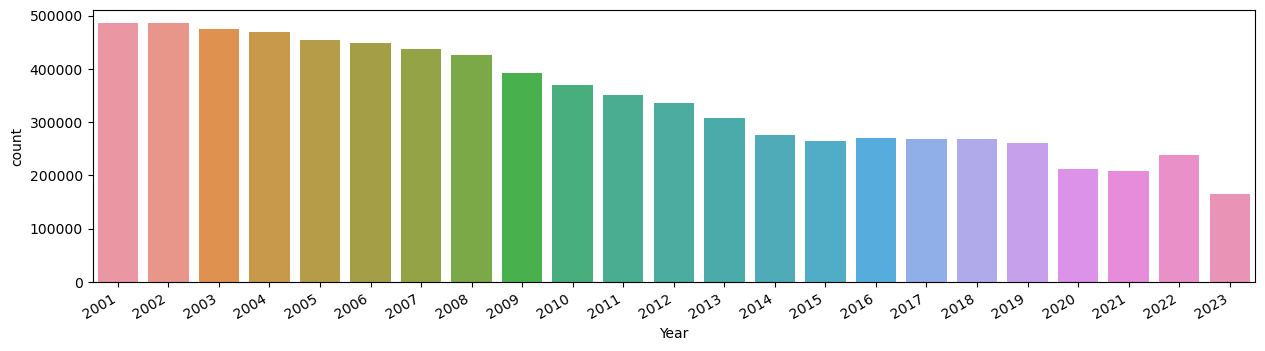

In [102]:
## Visualize years of crime
ax = sns.countplot(df_year, x='Year')
fig = ax.get_figure()
fig.autofmt_xdate()

# Q1) Is the total number of crimes increasing or decreasing across the years?
    * From our chart above, we can see the number of crimes is decreasing.